In [1]:
import pandas as pd
pd.set_option("display.max_rows",45)
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=4)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j].round(4),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot(pred_value):
    from sklearn.metrics import confusion_matrix
    cm_2labels = confusion_matrix(y_pred = pred_value, y_true = actual_value)
    plt.figure(figsize=[6,6])
    plot_confusion_matrix(cm_2labels, output_columns_2labels, normalize = True)

In [3]:
kdd_diff_level_train = pd.read_pickle("dataset/kdd_diff_level_train.pkl")
kdd_diff_level_test = pd.read_pickle("dataset/kdd_diff_level_test.pkl")
actual_value = pd.read_pickle("dataset/kdd_test_2labels_y.pkl");
#output_columns_2labels = ['Normal','Attack']
output_columns_2labels = ['Attack','Normal']

In [4]:
def get_count(pred_value):
    difficulty = pd.DataFrame({"Actual":actual_value, "Predict":pred_value, "difficulty_level":kdd_diff_level_test})
    #difficulty = pd.concat(difficulty, pd.Data)
    difficulty['accuracy'] = None
    difficulty.ix[difficulty.Actual == difficulty.Predict, "accuracy"] = 'Correct'
    difficulty.ix[difficulty.Actual != difficulty.Predict, "accuracy"] = 'Incorrect'
    diff_group = difficulty.loc[:,["difficulty_level", "accuracy", "Predict"]].groupby(["difficulty_level", "accuracy"])
    total_correct = sum(difficulty.Actual == difficulty.Predict)
    total_records = difficulty.shape[0]
    total_incorrect = total_records - total_correct
    return diff_group.count()

In [5]:
dense_only_predictions = pd.read_pickle("dataset/dense_only_predictions.pkl")
dense_only_scores = pd.read_pickle("dataset/dense_only_scores.pkl")

In [6]:
dense_only_scores.sort_values("test_score", ascending=False)

,epoch,no_of_features,hidden_layers,train_score,test_score
6,10,8,4,0.946034,0.754170
25,10,128,2,0.955255,0.751907
11,10,16,4,0.966501,0.747915
5,10,8,2,0.918104,0.738556
15,10,32,2,0.959052,0.731281
17,10,32,6,0.962942,0.727910
21,10,64,4,0.966316,0.727644
20,10,64,2,0.963630,0.727511
30,10,256,2,0.969332,0.724317
0,10,4,2,0.889567,0.722276


Normalized confusion matrix
[[ 0.6195  0.3805]
 [ 0.073   0.927 ]]


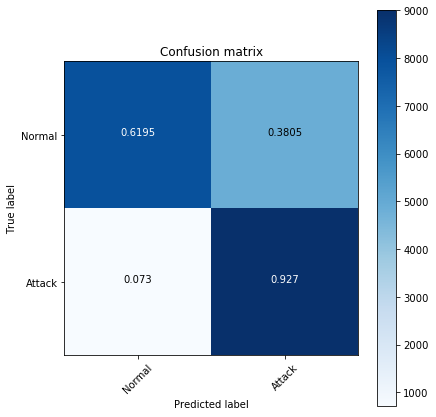

In [7]:
pred_value = dense_only_predictions.loc[:,"10_8_4"]
plot(pred_value)

In [8]:
get_count(pred_value)
#dense_only_predictions

Predict
difficulty_level accuracy          
0                Correct          5
                 Incorrect      118
1                Correct          1
                 Incorrect       86
2                Correct          1
                 Incorrect       54
3                Correct          4
                 Incorrect      112
4                Correct          8
                 Incorrect       93
5                Correct         21
                 Incorrect       82
6                Correct         30
                 Incorrect      127
7                Correct         32
                 Incorrect      217
8                Correct         54
                 Incorrect       77
9                Correct         20
                 Incorrect       86
10               Correct         35
                 Incorrect      160
11               Correct         47
                 Incorrect      414
12               Correct        103
                 Incorrect      383
13               Correct        185
                 Incorrect      334
14               Correct        277
                 Incorrect      459
15               Correct        367
                 Incorrect      809
16               Correct        245
                 Incorrect      436
17               Correct        523
                 Incorrect      645
18               Correct       2334
                 Incorrect      633
19               Correct        730
                 Incorrect      160
20               Correct       1294
                 Incorrect       49
21               Correct      10636
                 Incorrect       58

In [9]:
vae_dense_predictions = pd.read_pickle("dataset/vae_dense_predictions.pkl")
vae_dense_scores = pd.read_pickle("dataset/vae_dense_scores.pkl")

In [10]:
vae_dense_scores.sort_values("test_score", ascending=False)

,epoch,no_of_features,hidden_layers,train_score,test_score
20,1,32,6,0.743838,0.840711
16,1,2,6,0.875769,0.839647
7,1,256,2,0.846041,0.807488
19,1,16,6,0.889165,0.783002
23,1,256,6,0.888946,0.775994
15,1,256,4,0.836952,0.753194
2,1,8,2,0.907363,0.751996
6,1,128,2,0.877396,0.737713
1,1,4,2,0.926335,0.732656
14,1,128,4,0.814348,0.724760


Normalized confusion matrix
[[ 0.9613  0.0387]
 [ 0.3186  0.6814]]


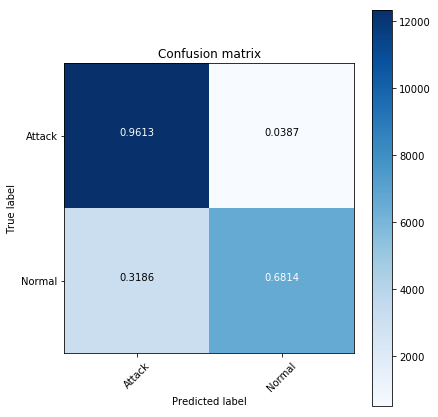

In [11]:
pred_value = vae_dense_predictions.loc[:,"1_32_6"]
output_columns_2labels = ['Attack','Normal']
plot(pred_value)

In [12]:
get_count(pred_value)
#vae_dense_predictions

Predict
difficulty_level accuracy          
0                Correct        116
                 Incorrect        7
1                Correct         75
                 Incorrect       12
2                Correct         47
                 Incorrect        8
3                Correct         61
                 Incorrect       55
4                Correct         66
                 Incorrect       35
5                Correct         70
                 Incorrect       33
6                Correct        122
                 Incorrect       35
7                Correct        224
                 Incorrect       25
8                Correct        120
                 Incorrect       11
9                Correct         94
                 Incorrect       12
10               Correct        161
                 Incorrect       34
11               Correct        311
                 Incorrect      150
12               Correct        385
                 Incorrect      101
13               Correct        456
                 Incorrect       63
14               Correct        657
                 Incorrect       79
15               Correct       1068
                 Incorrect      108
16               Correct        527
                 Incorrect      154
17               Correct        717
                 Incorrect      451
18               Correct       2323
                 Incorrect      644
19               Correct        796
                 Incorrect       94
20               Correct        999
                 Incorrect      344
21               Correct       9558
                 Incorrect     1136

In [13]:
vae_only_predictions = pd.read_pickle("dataset/vae_only_predictions.pkl")
vae_only_scores = pd.read_pickle("dataset/vae_only_scores.pkl")

In [14]:
vae_only_scores.sort_values("test_score", ascending=True)

,epoch,no_of_features,hidden_layers,train_score,test_score
11,1,1024,6,0.698707,1.786171
10,1,256,6,0.757614,1.828672
15,1,32,10,0.762060,1.835534
8,1,16,6,0.768247,1.837274
7,1,8,6,0.760923,1.845780
6,1,4,6,0.758832,1.850399
9,1,32,6,0.781125,1.859858
1,1,8,2,0.800566,1.873189
14,1,16,10,0.807379,1.896822
16,1,256,10,0.798418,1.899578


Normalized confusion matrix
[[ 0.7744  0.2256]
 [ 0.1148  0.8852]]


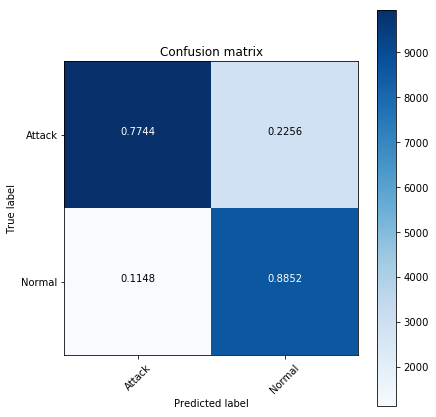

In [15]:
pred_value = vae_only_predictions["1_1024_6"]
plot(pred_value)

In [16]:
get_count(pred_value)

Predict
difficulty_level accuracy          
0                Correct         56
                 Incorrect       67
1                Correct         36
                 Incorrect       51
2                Correct         18
                 Incorrect       37
3                Correct         26
                 Incorrect       90
4                Correct         24
                 Incorrect       77
5                Correct         28
                 Incorrect       75
6                Correct         88
                 Incorrect       69
7                Correct        171
                 Incorrect       78
8                Correct        100
                 Incorrect       31
9                Correct         70
                 Incorrect       36
10               Correct         94
                 Incorrect      101
11               Correct        195
                 Incorrect      266
12               Correct        241
                 Incorrect      245
13               Correct        294
                 Incorrect      225
14               Correct        498
                 Incorrect      238
15               Correct        804
                 Incorrect      372
16               Correct        300
                 Incorrect      381
17               Correct        532
                 Incorrect      636
18               Correct       2457
                 Incorrect      510
19               Correct        745
                 Incorrect      145
20               Correct       1229
                 Incorrect      114
21               Correct      10528
                 Incorrect      166